In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

<h2 style="color:pink"> load datasets</h2>

In [2]:
glass = pd.read_csv('glass.data',header=None)
semeion = pd.DataFrame(np.loadtxt('semeion.data'))
wdbc = pd.read_csv('wdbc.data', header=None)
wpbc = pd.read_csv('wpbc.data', header=None)

<h2 style="color:blue"> read glass dataset </h2>
<ul>
    <li>number of features: 9</li>
    <li>number of classes: 7</li>
    <li>number of data: 214</li>
</ul>

In [3]:
Xg = glass.drop([0,10],axis=1)
Yg = glass[10]
x1g = Xg[Yg==1]
x2g = Xg[Yg==2]
Xg.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0


<h2 style="color:blue"> read semeion dataset </h2>
<ul>
    <li>number of features: 256, boolean</li>
    <li>number of classes: 10</li>
    <li>number of data: 1593</li>
</ul>

In [4]:
Ys = semeion[256]
for i in range(10):
    Ys[semeion[256+i]==1] = i+1
Xs = semeion.drop(range(256,266),axis=1)
Xs.shape

(1593, 256)

<h2 style="color:blue"> read wdbc dataset </h2>
<ul>
    <li>number of features: 30</li>
    <li>number of classes: 2</li>
    <li>number of data: 569</li>
</ul>

In [5]:
Xwd = wdbc.drop([0,1],axis=1)
Ywd = (wdbc[1]=='M')
Xwd.shape

(569, 30)

<h2 style="color:blue"> read wpdc dataset </h2>
<ul>
    <li>number of features: 33</li>
    <li>number of classes: 2</li>
    <li>number of data: 198</li>
</ul>

In [6]:
Xwd = wpbc.drop([0,1],axis=1)
Ywd = (wpbc[1]=='M')
Xwd.head()

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,34
0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


<h2 style="color:purple"> PCA </h2>

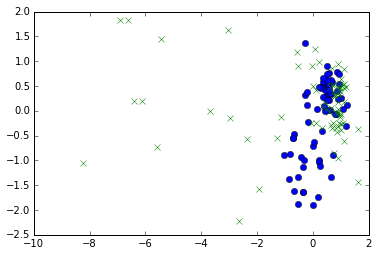

In [15]:
Components = 5
pca = PCA(n_components=Components)
transformedXg = pca.fit_transform(pd.concat([x1g,x2g]))

plt.plot(transformedXg[:x1g.shape[0],0],transformedXg[:x1g.shape[0],1],'o')
plt.plot(transformedXg[x1g.shape[0]:,0],transformedXg[x1g.shape[0]:,1],'x')
plt.show()

<h2 style="color:purple"> LDA </h2>

(146L, 1L)


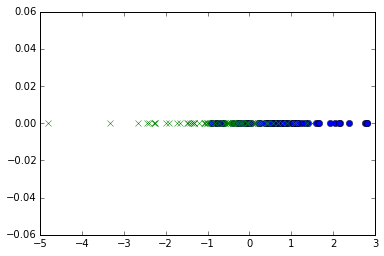

In [25]:
from sklearn.lda import LDA
lda = LDA(n_components=5)

xg = pd.concat([x1g,x2g])
yg = np.zeros(xg.shape[0])
yg[:x1g.shape[0]] = np.ones(x1g.shape[0])
transformedXg2 = lda.fit_transform(xg,yg)
print transformedXg2.shape
plt.plot(transformedXg2[:x1g.shape[0],0],np.zeros(x1g.shape[0]),'o')
plt.plot(transformedXg2[x1g.shape[0]:,0],np.zeros(x2g.shape[0]),'x')
plt.show()

<h2 style="color:purple"> Supervised Graph</h2>

<h2 style="color:purple"> Unsupervised Graph</h2>

<h2 style="color:green"> Classify </h2>